In [1]:
import pandas as pd
cast = pd.read_csv("movies actors dataset.csv")
films = pd.read_csv("דאטה סט לעבודת יחיד פרוייקט גמר", sep=',')
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [7]:
films

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015
...,...,...
215976,Le mouton noir,1922
215977,Edge of the Unknown,2015
215978,E yue,2005
215979,Lakota Girls,2015


## 1.	How many movies have the title "Hamlet"?

In [19]:
num_hamlets = films.title.value_counts()["Hamlet"]
hamlets = films[films.title == "Hamlet"].sort_values('year')
print (hamlets.title.count())
hamlets

19


,title,year
43511,Hamlet,1910
195015,Hamlet,1911
154627,Hamlet,1913
91710,Hamlet,1921
5562,Hamlet,1948
68239,Hamlet,1954
169996,Hamlet,1964
114224,Hamlet,1969
205821,Hamlet,1973
85741,Hamlet,1976


## 2.	List all of the "Treasure Island" movies from earliest to most recent.

In [20]:
sort_treasure_island = films[films.title=="Treasure Island"]
sort_treasure_island.sort_values(by = 'year')

,title,year
191379,Treasure Island,1918
47769,Treasure Island,1920
192917,Treasure Island,1934
90175,Treasure Island,1950
104714,Treasure Island,1972
103646,Treasure Island,1973
190792,Treasure Island,1985
166675,Treasure Island,1999


## 3.	How many roles were credited in the silent 1921 version of Hamlet?

In [88]:
roles = cast[(cast['title'] == 'Hamlet') & (cast['year'] == 1921)]
roles.shape[0]

9

## 4.	Use groupby() to plot the number of "Hamlet" films made each decade

<AxesSubplot:xlabel='year'>

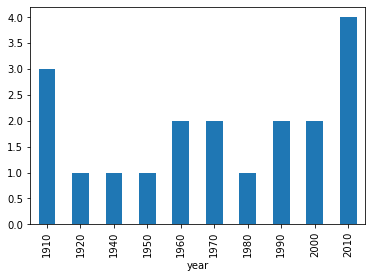

In [25]:
hamlets = films[films['title'] == 'Hamlet']
hamlet_per_decade = hamlets.groupby((hamlets.year//10)*10).count().title
hamlet_per_decade.plot(kind='bar')

## 5.	How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [12]:
one_role_50s = cast[(cast['year']>=1950) & (cast['year']<1960) & (cast['n']==1.0)]
answer = one_role_50s.groupby(["year","type"]).name.count()
print(answer)

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
Name: name, dtype: int64


## 6.	List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [21]:
cast[(cast['n']==1) & (cast['year']>=1990)].value_counts('name').head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

## 7.	List, in order by year, each of the films in which Frank Oz has played more than 1 role

In [229]:
Frank_Oz_roles = cast[cast['name']=='Frank Oz'].sort_values('year')
number_roles = Frank_Oz_roles.groupby(['year','title']).title.count()
number_roles[number_roles>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
Name: title, dtype: int64